In [80]:
import numpy as np
import matplotlib.pyplot as plt

latexpreamble = r""" 
\usepackage{bm}
\usepackage{amsmath}
\usepackage{cmbright}

\renewcommand{\b}[1]    {\boldsymbol{#1}}
\renewcommand{\r}[1]    {\mathrm{#1}}
\renewcommand{\d}       {\partial}
"""

plt.rc("text.latex", preamble=latexpreamble)
plt.rc("font", family="sans-serif")

def plot_nusselt(filename):

    file = np.load(filename)

    t = file["t"]
    Nu1 = file["Nu1"]
    Nu2 = file["Nu2"]
    Nu3 = file["Nu3"]

    fig, ax = plt.subplots()
    plt.plot(t, Nu1, label=r"$ 1 + \kappa^{-1} \langle w b \rangle $")
    plt.plot(t, Nu2, label=r"$ 1 + \r{Pr} \langle | \nabla \bm{u} |^2 \rangle $")
    plt.plot(t, Nu3, label=r"$ \langle |\nabla b|^2 \rangle $")
    
    fig.suptitle(filename.replace('_', '\_'))

    plt.ylim(0, 20)
    plt.xlabel(r"$t$")
    plt.ylabel("Nusselt number")
    plt.legend()

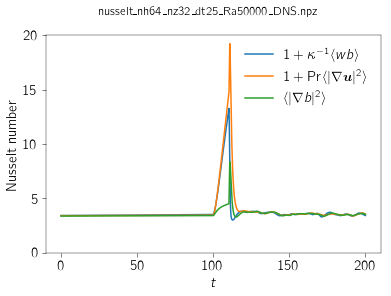

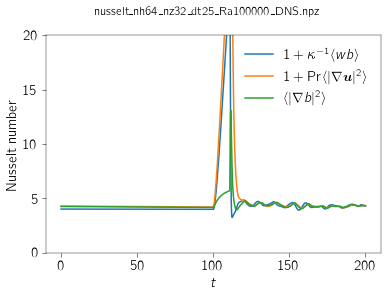

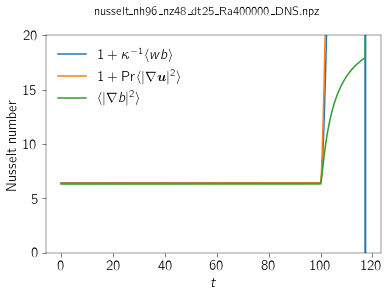

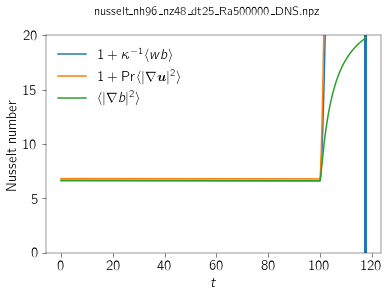

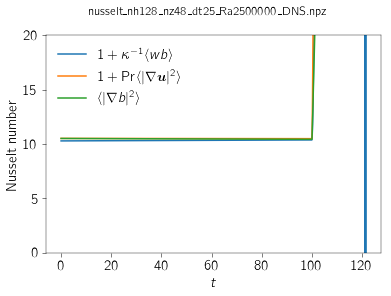

In [81]:
filenames = [
    "nusselt_nh64_nz32_dt25_Ra50000_DNS.npz",
    "nusselt_nh64_nz32_dt25_Ra100000_DNS.npz",
    "nusselt_nh96_nz48_dt25_Ra400000_DNS.npz",
    "nusselt_nh96_nz48_dt25_Ra500000_DNS.npz",
    "nusselt_nh128_nz48_dt25_Ra2500000_DNS.npz",
]

for filename in filenames:
    plot_nusselt(filename)